In [2]:
%pip install huggingface-hub
%pip install numpy
%pip install opencv-python
%pip install matplotlib
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import

In [3]:
import os
import json
import re
import time
import math
import numpy as np
import numpy

In [4]:
import cv2
import matplotlib.pyplot as plt

## Config

In [ ]:
# secret_hf =

In [ ]:
# !huggingface-cli login --token $secret_hf

## Download data

In [7]:
!mkdir dataset

mkdir: cannot create directory 'dataset': File exists


In [8]:
from huggingface_hub import hf_hub_download
hf_hub_download(repo_id="hotamago/Hoc-sau-va-ung-dung-nhom-2", filename="imagedata.zip", revision="main", repo_type="dataset", local_dir="dataset", local_dir_use_symlinks=False)
hf_hub_download(repo_id="hotamago/Hoc-sau-va-ung-dung-nhom-2", filename="label.txt", revision="main", repo_type="dataset", local_dir="dataset", local_dir_use_symlinks=False)

imagedata.zip:   0%|          | 0.00/1.91G [00:00<?, ?B/s]

label.txt:   0%|          | 0.00/53.1k [00:00<?, ?B/s]

'dataset/label.txt'

In [9]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-25ubuntu1.2).
0 upgraded, 0 newly installed, 0 to remove and 65 not upgraded.


In [10]:
!mkdir datasetImage
!unzip -q -o "dataset/imagedata.zip" -d "datasetImage"

In [11]:
!ls

dataset  datasetImage


## Load data

In [12]:
rawlabel = ""

In [14]:
# load label
with open("dataset/label.txt", "r") as f:
    rawlabel = f.read()

# G93aRj07CIZPKaC8.jpg {"label-8":14,"label-7":3,"label-2":4} 16
# name image, label(json), totel people vote
# Format to json {name, label, totel}
labelDataset = []
arrayRawLabel = rawlabel.split("\n")
for ele in arrayRawLabel:
    eleArr = ele.split(" ")
    try:
        labelDataset.append({
            "name": eleArr[0],
            "label": json.loads(eleArr[1]),
            "total": int(eleArr[2])
        })
    except:
        print(ele)

In [15]:
labelDataset

[{'name': 'G93aRj07CIZPKaC8.jpg',
  'label': {'label-8': 15, 'label-7': 3, 'label-2': 4},
  'total': 17},
 {'name': 'RegHq4XXn47vZXgJ.jpg',
  'label': {'label-1': 17, 'label-3': 11, 'label-5': 11},
  'total': 17},
 {'name': 'PJnH6hppfx5jqVB1.jpg',
  'label': {'label-0': 15, 'label-2': 2},
  'total': 17},
 {'name': 'qTWgse53YHk92qu7.jpg',
  'label': {'label-0': 14, 'label-1': 3, 'label-4': 3},
  'total': 17},
 {'name': 'yFEIaa1OoxdKdhlR.jpg',
  'label': {'label-0': 14, 'label-2': 3},
  'total': 17},
 {'name': 'bGr98BVn6bz9ae6V.jpg',
  'label': {'label-0': 8, 'label-2': 7, 'label-9': 1, 'label-1': 2},
  'total': 17},
 {'name': 'KwquahPDfGFvljrP.jpg',
  'label': {'label-1': 13, 'label-5': 13, 'label-0': 2},
  'total': 17},
 {'name': 'ZIKhin8iBORVzxm6.jpg',
  'label': {'label-1': 16, 'label-3': 14},
  'total': 17},
 {'name': 'NXSRO4Ond1oXjMqO.jpg',
  'label': {'label-0': 14, 'label-2': 4},
  'total': 17},
 {'name': 'ruDRjVGGS5E4ZgqM.jpg',
  'label': {'label-1': 15, 'label-4': 16},
  'total

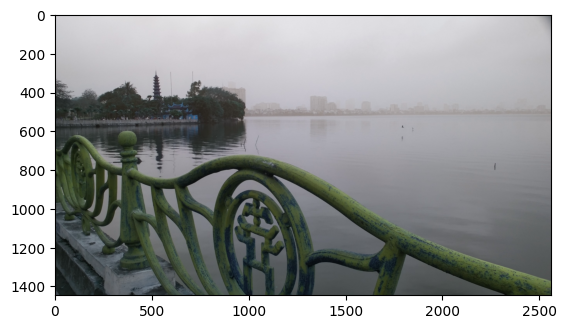

In [16]:
path = 'datasetImage/file/26HdRG7ZdiSlumOa.jpg'
img = cv2.imread(path)
plt.imshow(img)
plt.show()

In [59]:
import cv2
import numpy as np

def compress_image(image, target_size_kb=20):
    
    # Calculate the initial image size
    _, encoded_image = cv2.imencode('.jpg', image)
    initial_size_kb = len(encoded_image.tobytes()) / 1024

    # Calculate the scaling factor based on the target size
    scaling_factor = np.sqrt(target_size_kb / initial_size_kb)

    # Resize the image using the scaling factor
    resized_image = cv2.resize(image, (0, 0), fx=scaling_factor, fy=scaling_factor)

    # Check the size of the resized image
    _, encoded_image = cv2.imencode('.jpg', resized_image)
    image_size_kb = len(encoded_image.tobytes()) / 1024

    # If the size is still larger than target_size_kb, reduce the quality until it fits
    count = 0
    while image_size_kb > target_size_kb and count < 1000:
        count += 1
        _, encoded_image = cv2.imencode('.jpg', resized_image, [cv2.IMWRITE_JPEG_QUALITY, 90])
        resized_image = cv2.imdecode(encoded_image, cv2.IMREAD_COLOR)
        _, encoded_image = cv2.imencode('.jpg', resized_image)
        image_size_kb = len(encoded_image.tobytes()) / 1024

    # Save the compressed image

    return resized_image

In [60]:
def calibrate_image(image_path, target_size_kb=20):
    # Load the image
    image = cv2.imread(image_path)

    # Resize image to the target size
    resized_image = cv2.resize(image, (224, 224))

    return compress_image(resized_image)


In [18]:
!mkdir resized_img

**Sample use of Calibrated **

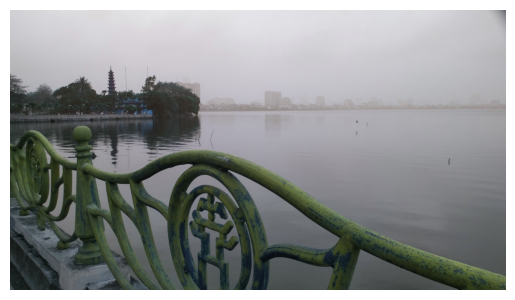

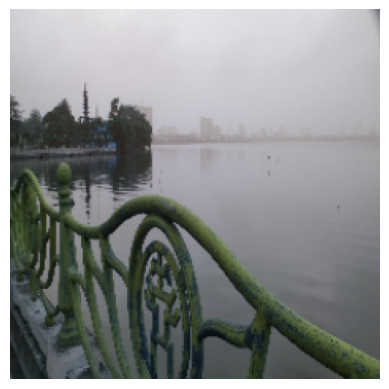

In [61]:
image = cv2.imread('datasetImage/file/26HdRG7ZdiSlumOa.jpg')
calibrated = calibrate_image('datasetImage/file/26HdRG7ZdiSlumOa.jpg')


# Convert BGR to RGB format for matplotlib


# Display the images using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()

plt.imshow(calibrated)
plt.axis('off')
plt.show()

**Save Calibrated Image**

In [62]:
def Calibrated_dataSet(inputPath, outputPath):
    image_files = os.listdir(inputPath)


    for file_name in image_files:
    # Construct the full path of the input image
      input_image_path = os.path.join(inputPath, file_name)
    # Calibrate the image
      calibrated_image = calibrate_image(input_image_path)

    # Construct the full path of the output image
      output_image_path = os.path.join(outputPath, file_name)

    # Save the calibrated image
      cv2.imwrite(output_image_path, calibrated_image)
      print("complete save: ", output_image_path)  

In [63]:
input_directory = 'datasetImage/file'
output_directory = 'resized_img'
Calibrated_dataSet(input_directory, output_directory)

complete save:  resized_img/qV6aG9ZMpIYwmwUC.jpg
complete save:  resized_img/zL2H1w5L4AMxiTJw.jpg
complete save:  resized_img/im7ezmEA4ByKjPRH.jpg
complete save:  resized_img/55tl0j32V7MGsf4I.jpg
complete save:  resized_img/f126yEDaq3LnWFBG.jpg
complete save:  resized_img/QRlg3lMozSWLkoSv.jpg
complete save:  resized_img/n1gEpQEb1fzcsNFz.jpg
complete save:  resized_img/PjIKKWPMNF7WunjR.jpg
complete save:  resized_img/aveTW2spNwIsnKFc.jpg
complete save:  resized_img/juniJYrTRsqwT5qh.jpg
complete save:  resized_img/0FrdwLcMmGlHpDMw.jpg
complete save:  resized_img/LvwpMLCa3UpqpzHM.jpg
complete save:  resized_img/cRcx52kBBAGpk9Bd.jpg
complete save:  resized_img/qBa9T6U6OPbaZzFY.jpg
complete save:  resized_img/GXV6ak5xKrTqUuGy.jpg
complete save:  resized_img/ZHVPDP12FQ6CsdJy.jpg
complete save:  resized_img/3qet2hrmlXjLWK38.jpg
complete save:  resized_img/y53siDJ3lDBZi8Y6.jpg
complete save:  resized_img/p45uO9Jq221a3a12.jpg
complete save:  resized_img/wyHDF92VmJYx3lBx.jpg
complete save:  resi

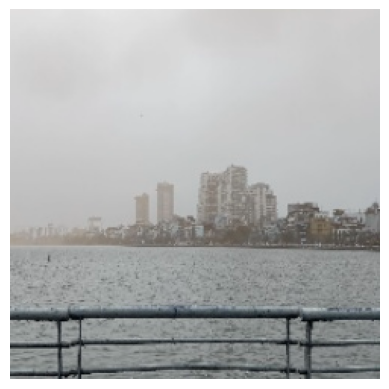

In [66]:
image = cv2.imread('resized_img/0FrdwLcMmGlHpDMw.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()


**Crop Image**

In [79]:
def crop_into_three(image):
    height, width, _ = image.shape

    # Check if width is larger than height
    if width > height:
        # Calculate the width of each cropped image
        crop_width = height

        # Crop the left, center, and right portions
        left_crop = image[:, :crop_width]
        center_crop = image[:, (width - crop_width) // 2 : (width + crop_width) // 2]
        right_crop = image[:, -crop_width:]

        return left_crop, center_crop, right_crop
    else:
        # Calculate the height of each cropped image
        crop_height = width

        # Crop the top, center, and bottom portions
        top_crop = image[:crop_height, :]
        center_crop = image[(height - crop_height) // 2 : (height + crop_height) // 2, :]
        bottom_crop = image[-crop_height:, :]

        return compress_image(top_crop), compress_image(center_crop), compress_image(bottom_crop)

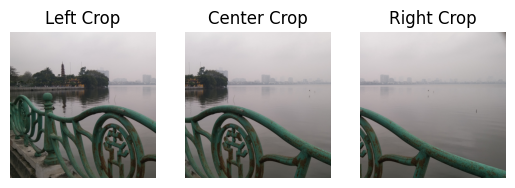

In [80]:
image = cv2.imread('datasetImage/file/26HdRG7ZdiSlumOa.jpg')

# Crop the image into three parts
cropped_images = crop_into_three(image)

titles = ['Left Crop', 'Center Crop', 'Right Crop'] if image.shape[1] > image.shape[0] else ['Top Crop', 'Center Crop', 'Bottom Crop']
for i, cropped_image in enumerate(cropped_images):
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB
    plt.title(titles[i])
    plt.axis('off')

plt.show()

In [83]:
directory = '/kaggle/working/crop/Left'
directory1 = '/kaggle/working/crop/Right'
directory2 = '/kaggle/working/crop/Mid'

# Create the directory
os.makedirs(directory, exist_ok=True)
os.makedirs(directory1, exist_ok=True)
os.makedirs(directory2, exist_ok=True)

In [88]:
def Crop_DataSet(inputPath, outputPath1,outputPath2,outputPath3):
    image_files = os.listdir(inputPath)
    for file_name in image_files:
    # Construct the full path of the input image
      input_image_path = os.path.join(inputPath, file_name)
    # Calibrate the image
      image = cv2.imread(input_image_path)
      l,m,r = crop_into_three(image)
      cv2.imwrite(os.path.join(outputPath1, file_name), compress_image(l))
     
      cv2.imwrite(os.path.join(outputPath2, file_name), compress_image(m))
      
      cv2.imwrite(os.path.join(outputPath3, file_name), compress_image(r))
      print("complete save: ", os.path.join(outputPath3, file_name))  

In [89]:
inputPath = 'datasetImage/file'
p1 = 'crop/Left'
p2 = 'crop/Mid'
p3 = 'crop/Right'
Crop_DataSet(inputPath, p1,p2,p3)

complete save:  crop/Right/qV6aG9ZMpIYwmwUC.jpg
complete save:  crop/Right/zL2H1w5L4AMxiTJw.jpg
complete save:  crop/Right/im7ezmEA4ByKjPRH.jpg
complete save:  crop/Right/55tl0j32V7MGsf4I.jpg
complete save:  crop/Right/f126yEDaq3LnWFBG.jpg
complete save:  crop/Right/QRlg3lMozSWLkoSv.jpg
complete save:  crop/Right/n1gEpQEb1fzcsNFz.jpg
complete save:  crop/Right/PjIKKWPMNF7WunjR.jpg
complete save:  crop/Right/aveTW2spNwIsnKFc.jpg
complete save:  crop/Right/juniJYrTRsqwT5qh.jpg
complete save:  crop/Right/0FrdwLcMmGlHpDMw.jpg
complete save:  crop/Right/LvwpMLCa3UpqpzHM.jpg
complete save:  crop/Right/cRcx52kBBAGpk9Bd.jpg
complete save:  crop/Right/qBa9T6U6OPbaZzFY.jpg
complete save:  crop/Right/GXV6ak5xKrTqUuGy.jpg
complete save:  crop/Right/ZHVPDP12FQ6CsdJy.jpg
complete save:  crop/Right/3qet2hrmlXjLWK38.jpg
complete save:  crop/Right/y53siDJ3lDBZi8Y6.jpg


KeyboardInterrupt: 

**Add Noise and Rotate **

In [105]:
import random
def rotate_image(image):
    # Get the image dimensions
    height, width = image.shape[:2]

    # Generate a random rotation angle between -45 and 45 degrees
    angle = random.randint(0, 45)

    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)

    # Calculate the new dimensions for the rotated image
    cos_theta = np.abs(rotation_matrix[0, 0])
    sin_theta = np.abs(rotation_matrix[0, 1])
    new_width = int((height * sin_theta) + (width * cos_theta))
    new_height = int((height * cos_theta) + (width * sin_theta))

    # Adjust the rotation matrix to account for the increased size
    rotation_matrix[0, 2] += (new_width / 2) - (width / 2)
    rotation_matrix[1, 2] += (new_height / 2) - (height / 2)

    # Perform the rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (new_width, new_height))

    return rotated_image

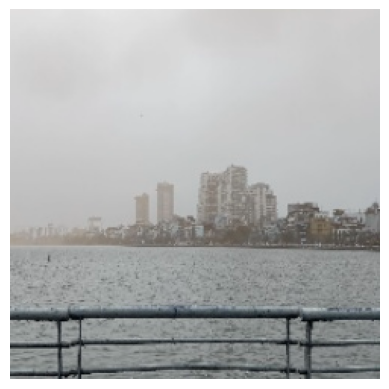

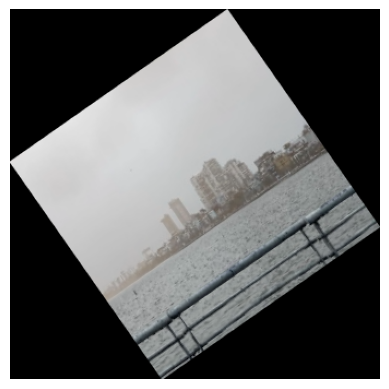

In [106]:
image = cv2.imread('resized_img/0FrdwLcMmGlHpDMw.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()
rotated = rotate_image(image)
plt.imshow(rotated)
plt.axis('off')
plt.show()

In [120]:
import cv2
import numpy as np

def add_noise(image, noise_type='gaussian', magnitude=0.05):
    if noise_type == 'gaussian':
        mean = 0
        std_dev = magnitude * 255
        noise = np.random.normal(mean, std_dev, image.shape).astype(np.uint8)
        noisy_image = cv2.addWeighted(image, 1.0, noise, 1.0, 0.0)
    elif noise_type == 'salt_and_pepper':
        noise = np.random.choice([0, 255], size=image.shape, p=[1 - magnitude, magnitude]).astype(np.uint8)
        noisy_image = cv2.add(image, noise)
      
    else:
        raise ValueError('Invalid noise type. Supported types are "gaussian" and "salt_and_pepper".')

    return noisy_image

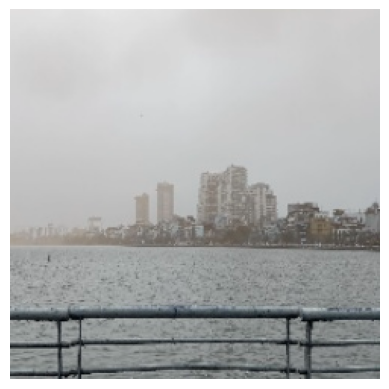

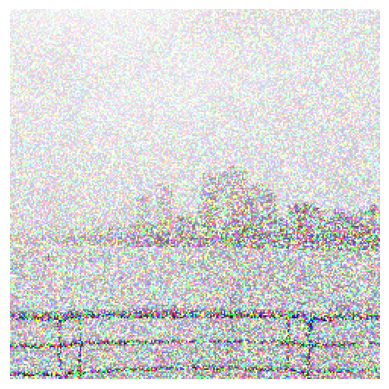

In [123]:
image = cv2.imread('resized_img/0FrdwLcMmGlHpDMw.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()
noise = add_noise(image, noise_type = 'gaussian',magnitude=0.03)
plt.imshow(noise)
plt.axis('off')
plt.show()

**Analytics balance location label**

In [130]:
# Label 0 -> 10, 0 is not good image need to delete
def LabelsToVector(labels):
    vectorLabel = [0] * 11
    for label, num in labels.items():
        if len(label.split("-")) != 2:
            print("Error: ", labels)
        vectorLabel[int(label.split("-")[1])] = num
    return vectorLabel

def NormalVectorLabel(vectorLabel, total, presentFilter):
    # Check if label 0 is > presentFilter
    if vectorLabel[0]/total > presentFilter:
        vectorLabel[0] = 1
        for i in range(1, len(vectorLabel)):
            vectorLabel[i] = 0
        return np.array(vectorLabel)

    # Process localcation label
    totalLocalVote = 0
    for i in range(1, 3):
        totalLocalVote += vectorLabel[i]
    if totalLocalVote > 0:
        for i in range(1, 3):
            vectorLabel[i] = 1 if vectorLabel[i]/totalLocalVote > presentFilter else 0

    # Process orther label
    for i in range(3, len(vectorLabel)):
        vectorLabel[i] = 1 if vectorLabel[i]/total > presentFilter else 0

    # Process speacil case
    # Auto set label 1
    goodLabel = [3, 4]
    for i in range(len(goodLabel)):
        if vectorLabel[goodLabel[i]] == 1:
            vectorLabel[1] = 1;

    # Auto set label 2
    goodLabel = [7, 8]
    for i in range(len(goodLabel)):
        if vectorLabel[goodLabel[i]] == 1:
            vectorLabel[2] = 1;

    # Check if label 1 or 2 is set
    if vectorLabel[1] == 0 and vectorLabel[2] == 0:
        vectorLabel[0] = 1
        for i in range(1, len(vectorLabel)):
            vectorLabel[i] = 0
        return np.array(vectorLabel)
#     else:
#         vectorLabel[0] = 0

    return np.array(vectorLabel)

In [132]:
# Filter label
for ele in labelDataset:
    # Only get label with > 50% vote
    ele["label"] = NormalVectorLabel(LabelsToVector(ele["label"]), ele["total"], 0.5)

# Filter bad image
clearLabelDataset = []
for ele in labelDataset:
    if ele["label"][0] == 0:
        ele["label"] = ele["label"][1:]
        clearLabelDataset.append(ele)
labelDataset = clearLabelDataset

ValueError: can only convert an array of size 1 to a Python scalar

In [28]:
# Map name for fast filter image
mapNameFastQuery = set()
for ele in labelDataset:
    mapNameFastQuery.add(ele["name"])

In [31]:
# Load image
imagesDataset = {}
for label in labelDataset:
    if label["name"] not in mapNameFastQuery:
        continue
    img = cv2.imread(os.path.join("/kaggle/working/datasetImage/file", label['name']))
    imagesDataset[label['name']] = img

## Process

In [33]:
print(len(labelDataset))
print(len(imagesDataset))

771
771


[302 470 143  96  63  50 112  63  45  94]


<BarContainer object of 10 artists>

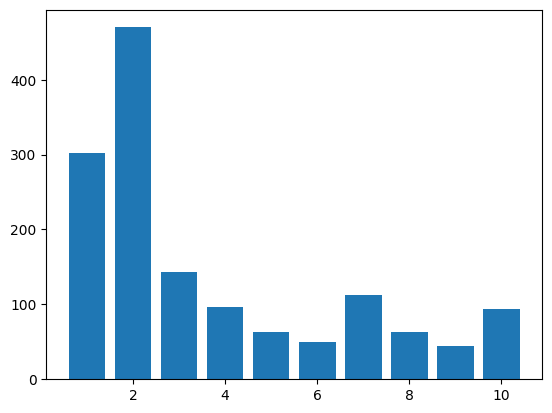

In [34]:
# Plot analytic banlance dataset

totalLabelDataset = np.array([0] * 10)
for ele in labelDataset:
    totalLabelDataset += ele["label"]

print(totalLabelDataset)

# Draw
plt.bar([i for i in range(1, 11)], totalLabelDataset)

In [37]:
print(labelDataset[0])

{'name': 'G93aRj07CIZPKaC8.jpg', 'label': array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0]), 'total': 17}


In [40]:
csvDataJSON = []
listGoodImage = []
labelValue = ["Hồ Gươm", "Hồ Tây", "Tháp rùa", "Cầu Thê Húc", "Bưu Điện", "Vườn Hoa", "Chùa Trấn Quốc", "Đền Quán Thánh", "Khách Sạn", "Công Viên Nước"]
for ele in labelDataset:
    labelTemp = {}
    for i in range(len(labelValue)):
        labelTemp[labelValue[i]] = ele["label"][i]
    csvDataJSON.append({
        "file": ele["name"],
        **labelTemp
    })
    listGoodImage.append(ele["name"])

In [ ]:
# Create csv file
import pandas as pd
pd.DataFrame(csvDataJSON).to_csv("labelData.csv", index=False)

In [ ]:
# Create list good
f = open("listimage.txt", "w")
f.write("\n".join(listGoodImage))
f.close()

In [ ]:
# Note:
# imagesDataset is an Dict key is name image, value is image data
# Using: get image data of label name N => imagesDataset[N]
# Get image data of label i => imagesDataset[labelDataset[i]["name"]]